# Inception NEt training

In [1]:

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:25<00:00, 201MB/s]
100% 2.70G/2.70G [00:25<00:00, 113MB/s]


In [3]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

batch_size = 32
epochs = 25

In [4]:
base_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"valid")

In [5]:
!unzip '/content/new-plant-diseases-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [6]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                             fill_mode="nearest")

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [7]:

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (image_size, image_size),
                                               batch_size = batch_size,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (image_size, image_size),
                                             batch_size = batch_size,
                                             class_mode = "categorical")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [8]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [9]:

import json
with open('class_indices.json','w') as f:
  json.dump(train_data.class_indices, f)

from IPython.display import FileLink
FileLink(r'class_indices.json')


/content/class_indices.json

In [10]:
import tensorflow as tf
from tensorflow import keras

# Load InceptionV3 model pre-trained on ImageNet
base_model = tf.keras.applications.InceptionV3(weights="imagenet",
                                               include_top=False,
                                               input_shape=input_shape)

# Freeze the base model so its weights are not updated during training
base_model.trainable = False


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:

# Define the input layer
inputs = keras.Input(shape=input_shape)

# Pass the inputs through the base model
x = base_model(inputs, training=False)

# Add a Global Average Pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a Dropout layer to prevent overfitting
x = tf.keras.layers.Dropout(0.2)(x)

# Add a Dense layer with softmax activation for classification
x = tf.keras.layers.Dense(len(categories), activation="softmax")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=x, name="InceptionV3_Model")


In [12]:

# Define the optimizer
optimizer = tf.keras.optimizers.Adam()

# Compile the model with categorical crossentropy loss and accuracy metrics
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy(), 'accuracy'])


In [13]:
model.summary()

Model: "InceptionV3_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 38)                  │          77,862 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,880,646 (83.47 MB)

 Trainable params: 77,862 (304.15 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [14]:
# Train the model
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=epochs,
                    steps_per_epoch=150,
                    validation_steps=100)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:567: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 96s 507ms/step - accuracy: 0.2518 - categorical_accuracy: 0.2518 - loss: 2.9377 - val_accuracy: 0.6684 - val_categorical_accuracy: 0.6684 - val_loss: 1.2214
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 452ms/step - accuracy: 0.6305 - categorical_accuracy: 0.6305 - loss: 1.2892 - val_accuracy: 0.7519 - val_categorical_accuracy: 0.7519 - val_loss: 0.8728
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 69s 460ms/step - accuracy: 0.7185 - categorical_accuracy: 0.7185 - loss: 0.9895 - val_accuracy: 0.7728 - val_categorical_accuracy: 0.7728 - val_loss: 0.7870
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 70s 471ms/step - accuracy: 0.7347 - categorical_accuracy: 0.7347 - loss: 0.8697 - val_accuracy: 0.7837 - val_categorical_accuracy: 0.7837 - val_loss: 0.7149
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 69s 464ms/step - accuracy: 0.7751 - categorical_accuracy: 0.7751 - loss: 0.7490 - val_accuracy: 0.7934 - val_categorical_accuracy: 0.7934 - val_loss: 0.6925
Epoch 6/25
150/150 ━━━━━━━

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 66s 443ms/step - accuracy: 0.7915 - categorical_accuracy: 0.7915 - loss: 0.6970 - val_accuracy: 0.8166 - val_categorical_accuracy: 0.8166 - val_loss: 0.5959
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 75s 502ms/step - accuracy: 0.7992 - categorical_accuracy: 0.7992 - loss: 0.6609 - val_accuracy: 0.8416 - val_categorical_accuracy: 0.8416 - val_loss: 0.5329
Epoch 9/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 436ms/step - accuracy: 0.8200 - categorical_accuracy: 0.8200 - loss: 0.5778 - val_accuracy: 0.8175 - val_categorical_accuracy: 0.8175 - val_loss: 0.5713
Epoch 10/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 434ms/step - accuracy: 0.8121 - categorical_accuracy: 0.8121 - loss: 0.6182 - val_accuracy: 0.8403 - val_categorical_accuracy: 0.8403 - val_loss: 0.5191
Epoch 11/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 66s 443ms/step - accuracy: 0.8137 - categorical_accuracy: 0.8137 - loss: 0.5909 - val_accuracy: 0.8456 - val_categorical_accuracy: 0.8456 - val_loss: 0.5026
Epoch 12/25
150/150 ━━━━

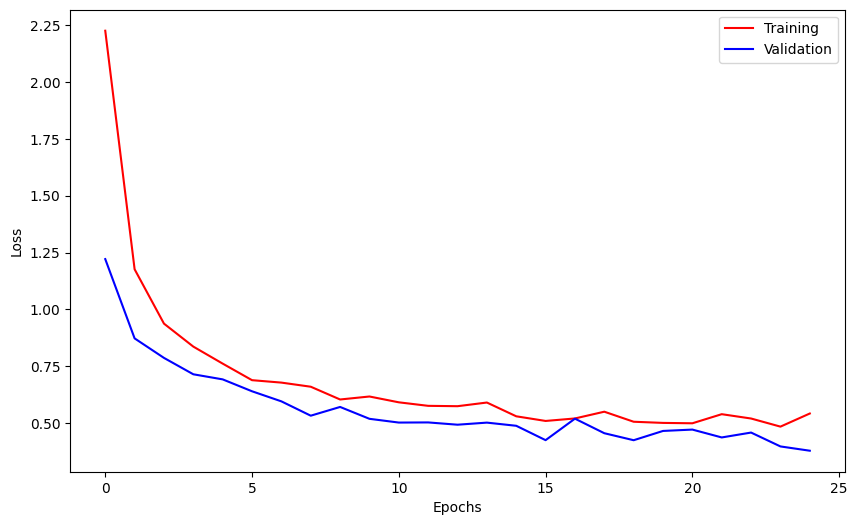

In [15]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

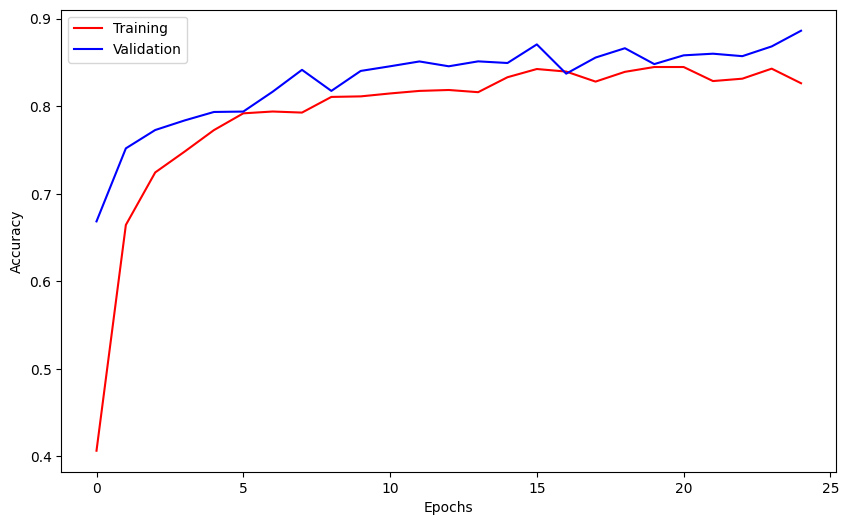

In [16]:

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [17]:
model.save('drive/MyDrive/inceptionnet_8866.h5')

In [20]:
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from IPython.display import FileLink
from PIL import Image
import io

def predict_image(image_path):
  """
  Predicts the disease of a plant image.

  Args:
    image_path: Path to the image file.

  Returns:
    A tuple containing the predicted disease and a list of suggestions.
  """
  # Load the image
  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = np.array(image)
  image = image / 255.0
  image = np.expand_dims(image, axis=0)

  # Load the model
  model = tf.keras.models.load_model('drive/MyDrive/inceptionnet_8866.h5')

  # Make the prediction
  prediction = model.predict(image)
  predicted_class = np.argmax(prediction)

  # Load the class indices
  with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

  # Get the predicted disease
  for key, value in class_indices.items():
    if value == predicted_class:
      predicted_disease = key
      break

  # Display the image
  plt.imshow(image[0])
  plt.title(f"Predicted Disease: {predicted_disease}")
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


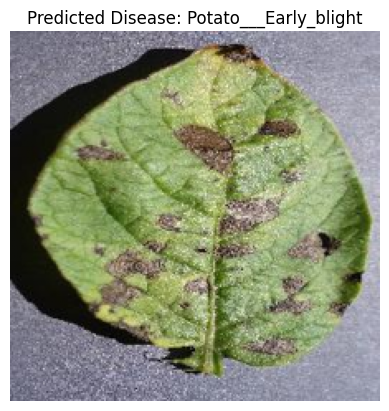

In [21]:
path = "/content/Potato Early Blight.JPG"
predict_image(path)

# Efficient NEt

In [28]:
import tensorflow as tf
from tensorflow import keras

# Load ResNet152V2 model pre-trained on ImageNet
base_model = tf.keras.applications.ResNet152V2(weights="imagenet",
                                               include_top=False,
                                               input_shape=input_shape)

# Freeze the base model so its weights are not updated during training
base_model.trainable = False

# Define the input layer
inputs = keras.Input(shape=input_shape)

# Pass the inputs through the base model
x = base_model(inputs, training=False)

# Add a Global Average Pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a Dropout layer to prevent overfitting
x = tf.keras.layers.Dropout(0.2)(x)

# Add a Dense layer with softmax activation for classification
x = tf.keras.layers.Dense(len(categories), activation="softmax")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=x, name="ResNet152V2_Model")

# Define the optimizer
optimizer = tf.keras.optimizers.Adam()

# Compile the model with categorical crossentropy loss and accuracy metrics
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy(), 'accuracy'])



234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [29]:
# Train the model
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=25,
                    steps_per_epoch=150,
                    validation_steps=100)


Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 171s 658ms/step - accuracy: 0.3151 - categorical_accuracy: 0.3151 - loss: 2.6459 - val_accuracy: 0.7681 - val_categorical_accuracy: 0.7681 - val_loss: 0.8466
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 92s 613ms/step - accuracy: 0.7196 - categorical_accuracy: 0.7196 - loss: 0.9880 - val_accuracy: 0.8269 - val_categorical_accuracy: 0.8269 - val_loss: 0.6153
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 89s 599ms/step - accuracy: 0.7897 - categorical_accuracy: 0.7897 - loss: 0.7202 - val_accuracy: 0.8512 - val_categorical_accuracy: 0.8512 - val_loss: 0.5111
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 88s 591ms/step - accuracy: 0.8286 - categorical_accuracy: 0.8286 - loss: 0.5858 - val_accuracy: 0.8666 - val_categorical_accuracy: 0.8666 - val_loss: 0.4451
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 91s 607ms/step - accuracy: 0.8315 - categorical_accuracy: 0.8315 - loss: 0.5570 - val_accuracy: 0.8747 - val_categorical_accuracy: 0.8747 - val_loss: 0.4038
Epoch 6/25
150

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 93s 621ms/step - accuracy: 0.8491 - categorical_accuracy: 0.8491 - loss: 0.4818 - val_accuracy: 0.8959 - val_categorical_accuracy: 0.8959 - val_loss: 0.3411
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 100s 668ms/step - accuracy: 0.8707 - categorical_accuracy: 0.8707 - loss: 0.4248 - val_accuracy: 0.8956 - val_categorical_accuracy: 0.8956 - val_loss: 0.3244
Epoch 9/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 90s 605ms/step - accuracy: 0.8733 - categorical_accuracy: 0.8733 - loss: 0.3983 - val_accuracy: 0.9062 - val_categorical_accuracy: 0.9062 - val_loss: 0.2997
Epoch 10/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 92s 619ms/step - accuracy: 0.8786 - categorical_accuracy: 0.8786 - loss: 0.4179 - val_accuracy: 0.9109 - val_categorical_accuracy: 0.9109 - val_loss: 0.2963
Epoch 11/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 91s 609ms/step - accuracy: 0.8822 - categorical_accuracy: 0.8822 - loss: 0.3779 - val_accuracy: 0.9078 - val_categorical_accuracy: 0.9078 - val_loss: 0.2765
Epoch 12/25
150/150 ━━━

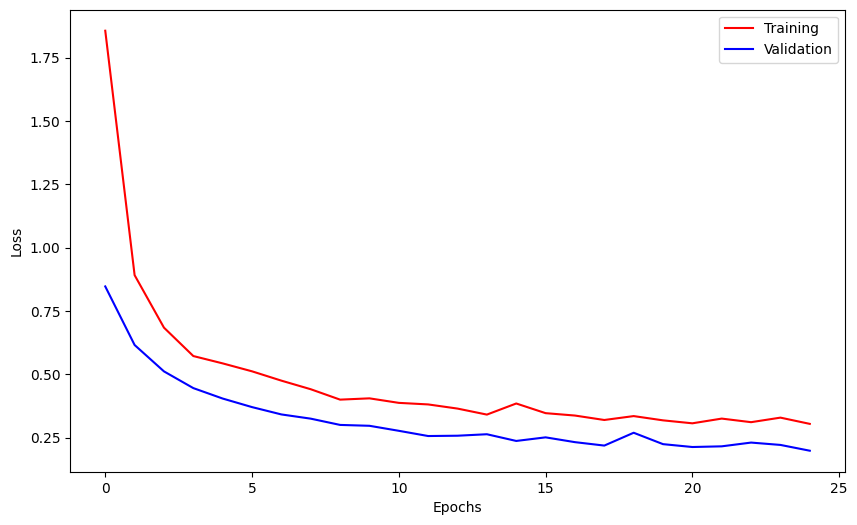

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

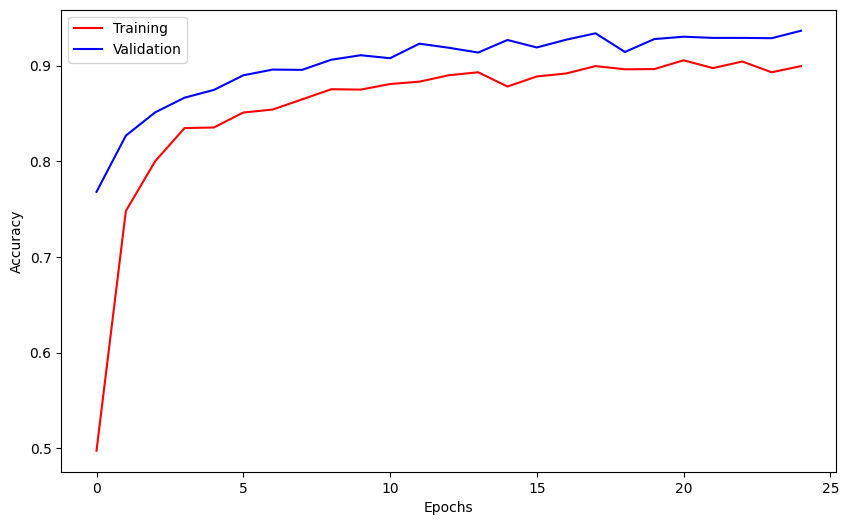

In [31]:

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [32]:
model.save('drive/MyDrive/resnte_9366.h5')

In [36]:
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from IPython.display import FileLink
from PIL import Image
import io

def predict_image(image_path):
  """
  Predicts the disease of a plant image.

  Args:
    image_path: Path to the image file.

  Returns:
    A tuple containing the predicted disease and a list of suggestions.
  """
  # Load the image
  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = np.array(image)
  image = image / 255.0
  image = np.expand_dims(image, axis=0)

  # Load the model
  model = tf.keras.models.load_model('drive/MyDrive/resnte_9366.h5')

  # Make the prediction
  prediction = model.predict(image)
  predicted_class = np.argmax(prediction)

  # Load the class indices
  with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

  # Get the predicted disease
  for key, value in class_indices.items():
    if value == predicted_class:
      predicted_disease = key
      break

  # Display the image
  plt.imshow(image[0])
  plt.title(f"Predicted Disease: {predicted_disease}")
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


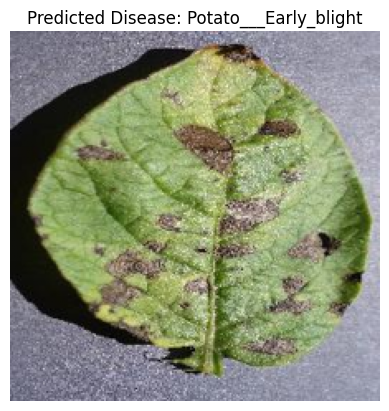

In [37]:
path = "/content/Potato Early Blight.JPG"
predict_image(path)